In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

plt.style.use("ggplot")
np.random.seed(42)


In [16]:
n = 100

data = pd.DataFrame({
    "date": pd.date_range(start="2025-01-01", periods=n, freq="D"),
    "source": np.random.choice(["Google", "Facebook", "LinkedIn", "Email"], n),
    "campaign": np.random.choice(["Winter", "Spring", "Summer", "Brand"], n),
    "country": np.random.choice(["USA", "UK", "Canada", "India"], n),
    "sessions": np.random.randint(50, 300, n),
    "conversions": np.random.randint(5, 80, n),
    "cost": np.random.uniform(500, 3000, n)
})

data["revenue"] = data["conversions"] * np.random.uniform(100, 600, n)

data.head()


,date,source,campaign,country,sessions,conversions,cost,revenue
0,2025-01-01,LinkedIn,Summer,Canada,274,29,1977.083151,14599.103719
1,2025-01-02,Email,Spring,India,178,22,576.250625,13095.556562
2,2025-01-03,Google,Spring,Canada,196,70,593.370472,21441.618692
3,2025-01-04,LinkedIn,Brand,USA,175,58,2556.501402,16588.524488
4,2025-01-05,LinkedIn,Spring,India,179,39,1400.476604,19040.052734


In [17]:
data["conversion_rate"] = (data["conversions"] / data["sessions"]) * 100
data["cpa"] = data["cost"] / data["conversions"]
data["roas"] = data["revenue"] / data["cost"]
data["revenue_per_session"] = data["revenue"] / data["sessions"]

data.describe()


,date,sessions,conversions,cost,revenue,conversion_rate,cpa,roas,revenue_per_session
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2025-02-19 12:00:00,186.100000,41.260000,1646.923827,15151.605734,26.771134,53.686314,11.732328,94.084142
min,2025-01-01 00:00:00,51.000000,6.000000,535.983722,634.060934,3.389831,8.476721,0.628890,4.561589
25%,2025-01-25 18:00:00,145.750000,26.000000,933.178019,7535.923859,12.886636,25.204300,5.001835,43.045743
50%,2025-02-19 12:00:00,195.000000,38.000000,1707.237130,14767.443959,23.347684,40.917849,8.510549,77.268595
75%,2025-03-16 06:00:00,234.500000,58.000000,2240.412365,21292.034546,33.612440,66.624677,13.598306,125.947703
max,2025-04-10 00:00:00,298.000000,73.000000,2939.630199,41157.285466,125.000000,235.735641,65.403731,398.822841
std,NaN,63.602697,19.000595,732.647523,9487.075506,20.190896,45.120494,11.378049,72.710892


In [18]:
total_revenue = data["revenue"].sum()
total_cost = data["cost"].sum()
overall_roas = total_revenue / total_cost

print("Total Revenue:", round(total_revenue,2))
print("Total Cost:", round(total_cost,2))
print("Overall ROAS:", round(overall_roas,2))


Total Revenue: 1515160.57
Total Cost: 164692.38
Overall ROAS: 9.2


In [19]:
campaign_summary = data.groupby(["source","campaign"]).agg({
    "sessions":"sum",
    "conversions":"sum",
    "revenue":"sum",
    "cost":"sum"
}).reset_index()

campaign_summary["roas"] = campaign_summary["revenue"] / campaign_summary["cost"]

campaign_summary.sort_values("revenue", ascending=False)


,source,campaign,sessions,conversions,revenue,cost,roas
15,LinkedIn,Winter,1971,503,223573.472327,17388.574972,12.857493
2,Email,Summer,2750,452,160123.815016,18214.841188,8.790843
5,Facebook,Spring,1575,291,142805.389534,17320.304312,8.244970
9,Google,Spring,933,234,116958.993583,5032.267313,23.241809
8,Google,Brand,1440,286,106674.910330,13954.351654,7.644562
4,Facebook,Brand,1063,282,104615.249467,11431.398449,9.151571
3,Email,Winter,751,217,102427.215537,10477.483334,9.775937
6,Facebook,Summer,843,291,94386.810951,9752.137770,9.678576
7,Facebook,Winter,1248,373,94169.331543,11264.308908,8.359974
13,LinkedIn,Spring,768,162,65082.650388,5198.953044,12.518415


In [20]:
country_summary = data.groupby("country").agg({
    "revenue":"sum",
    "cost":"sum"
}).reset_index()

country_summary["roas"] = country_summary["revenue"] / country_summary["cost"]

country_summary


,country,revenue,cost,roas
0,Canada,291655.047564,33124.860315,8.804718
1,India,480165.938350,47081.320271,10.198651
2,UK,354351.356148,36970.748678,9.584641
3,USA,388988.231363,47515.453447,8.186563


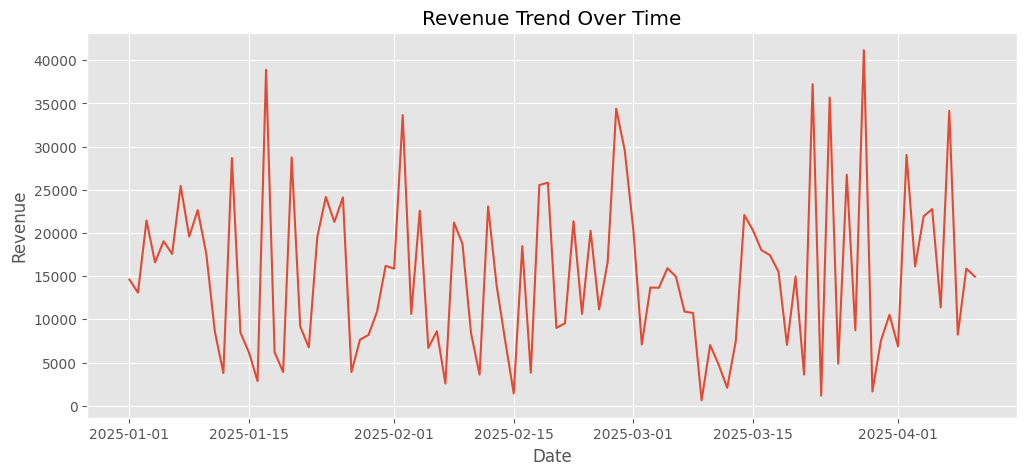

In [21]:
plt.figure(figsize=(12,5))
plt.plot(data["date"], data["revenue"])
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


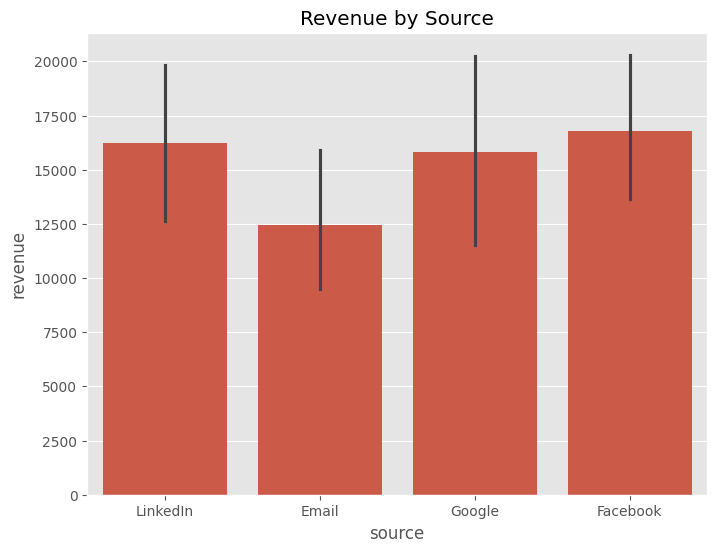

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="source", y="revenue")
plt.title("Revenue by Source")
plt.show()


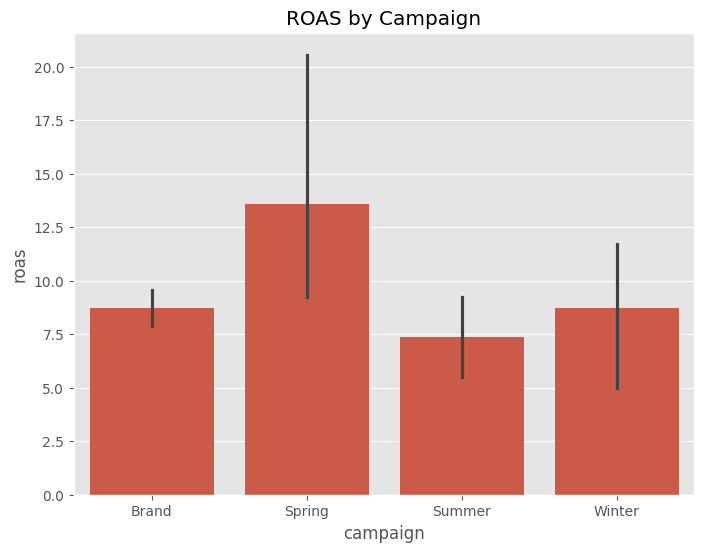

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=campaign_summary, x="campaign", y="roas")
plt.title("ROAS by Campaign")
plt.show()


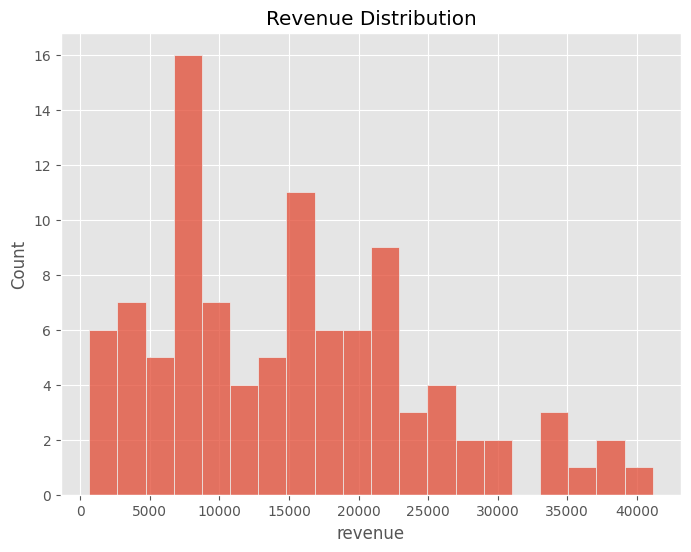

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data["revenue"], bins=20)
plt.title("Revenue Distribution")
plt.show()


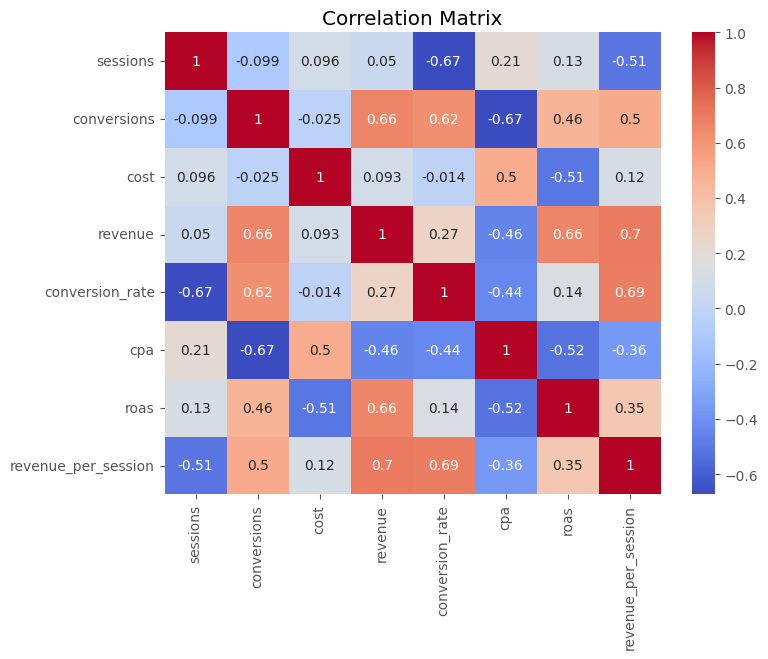

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


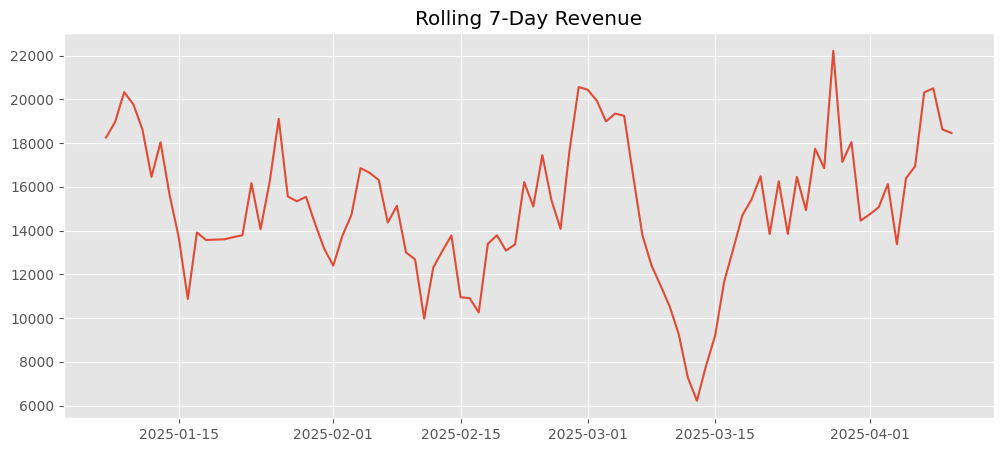

In [26]:
data["rolling_7day_revenue"] = data["revenue"].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(data["date"], data["rolling_7day_revenue"])
plt.title("Rolling 7-Day Revenue")
plt.show()


In [27]:
data["previous_revenue"] = data["revenue"].shift(1)
data["growth_%"] = ((data["revenue"] - data["previous_revenue"]) / data["previous_revenue"]) * 100

data.tail()


,date,source,campaign,country,sessions,conversions,cost,revenue,conversion_rate,cpa,roas,revenue_per_session,rolling_7day_revenue,previous_revenue,growth_%
95,2025-04-06,Facebook,Spring,India,124,29,2337.677610,11372.557523,23.387097,80.609573,4.864896,91.714174,16943.301639,22757.847202,-50.027973
96,2025-04-07,Facebook,Spring,UK,162,62,2508.702326,34135.898325,38.271605,40.462941,13.606994,210.715422,20316.469568,11372.557523,200.160261
97,2025-04-08,Email,Brand,Canada,249,67,1205.086431,8222.453741,26.907631,17.986365,6.823124,33.021903,20509.758743,34135.898325,-75.912590
98,2025-04-09,Facebook,Winter,USA,213,66,943.598859,15871.785257,30.985915,14.296952,16.820479,74.515424,18630.163446,8222.453741,93.029791
99,2025-04-10,Google,Summer,India,215,26,2376.536879,14955.349293,12.093023,91.405265,6.292917,69.559764,18463.288144,15871.785257,-5.773994


In [28]:
data.sort_values("revenue", ascending=False).head(10)


,date,source,campaign,country,sessions,conversions,cost,revenue,conversion_rate,cpa,roas,revenue_per_session,rolling_7day_revenue,previous_revenue,growth_%
86,2025-03-28,Facebook,Spring,USA,257,69,1297.439076,41157.285466,26.848249,18.803465,31.721941,160.145080,22222.454055,8732.413309,371.316279
16,2025-01-17,Email,Winter,India,172,71,2939.630199,38891.074612,41.279070,41.403242,13.229921,226.110899,13917.061498,2860.272806,1259.698087
80,2025-03-22,LinkedIn,Winter,India,296,64,673.403252,37223.121262,21.621622,10.521926,55.276123,125.753788,16256.924915,3600.564627,933.813446
82,2025-03-24,Google,Spring,UK,282,61,545.554564,35681.304215,21.631206,8.943517,65.403731,126.529448,16456.651201,1166.849611,2957.917994
57,2025-02-27,Google,Spring,UK,234,58,2087.734127,34394.030851,24.786325,35.995416,16.474335,146.983038,17707.616034,16635.104372,106.755726
96,2025-04-07,Facebook,Spring,UK,162,62,2508.702326,34135.898325,38.271605,40.462941,13.606994,210.715422,20316.469568,11372.557523,200.160261
32,2025-02-02,Email,Winter,India,119,68,2286.489807,33647.016855,57.142857,33.624850,14.715577,282.748041,13762.695686,15865.264700,112.079770
58,2025-02-28,LinkedIn,Winter,India,266,62,613.260024,29554.723743,23.308271,9.891291,48.192810,111.107984,20566.567509,34394.030851,-14.070195
91,2025-04-02,Email,Summer,Canada,169,70,795.412069,29028.952335,41.420118,11.363030,36.495489,171.768949,15070.446526,6869.429520,322.581704
19,2025-01-20,LinkedIn,Winter,Canada,73,52,2487.965487,28739.931387,71.232877,47.845490,11.551580,393.697690,13600.023750,3900.496552,636.827504


In [29]:
data["day_number"] = np.arange(len(data))

X = data[["day_number","sessions","cost"]]
y = data["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print("R2 Score:", r2_score(y_test,predictions))
print("MAE:", mean_absolute_error(y_test,predictions))


R2 Score: -0.06466019919586108
MAE: 7332.063516605073


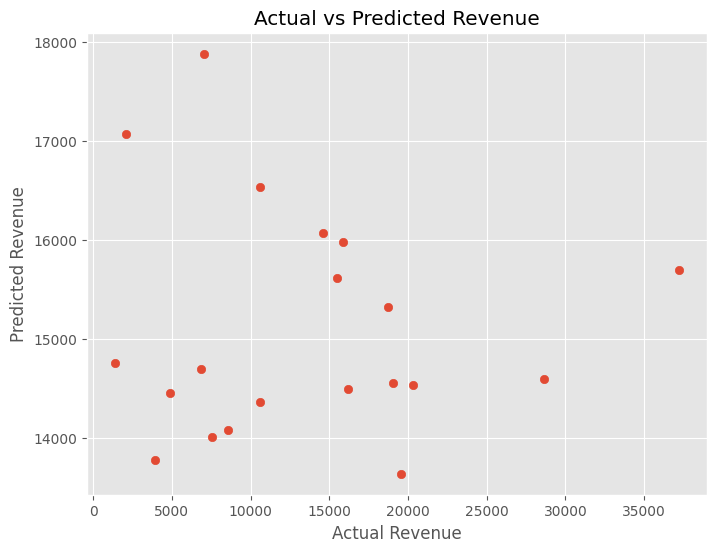

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()
